In [2]:
import torch
from torch import nn
from torch.nn import Linear
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

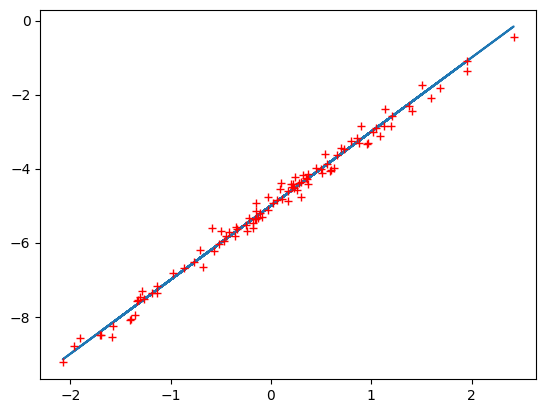

In [3]:
X = torch.randn((100,1))
f = 2*X-5
Y = f+0.2*torch.randn((100,1))#Add noise to data

plt.plot(X,f)
plt.plot(X,Y, "+r")

In [4]:
class LinearRegression(nn.Module):
  #Constructor
  def __init__(self, in_size, out_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(in_size, out_size)

  def forward(self, x):
    return self.linear(x)

In [5]:
def plotModel(X,Y,Yhat):
  plt.plot(X,f, color="blue", label="f")
  plt.plot(X,Y, "+", color="red")
  plt.plot(X, Yhat, color="green", label="Yhat")
  plt.legend()
  plt.show()


In [17]:
#
dset = TensorDataset(X, Y)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=dset, batch_size=10)
model = LinearRegression(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# print(model.state_dict())

In [18]:
def train_model(iter):
  totalLoss = []
  for epoch in range(iter):
    Loss = 0.0
    for x,y in trainloader:
      yhat = model(x)
      loss = criterion(yhat,y)
      Loss += loss.item()
      optimizer.zero_grad()
      loss.backward()#compute gradient
      optimizer.step()#update parameters
    totalLoss.append(Loss)
  return totalLoss

In [19]:
Loss = train_model(10)

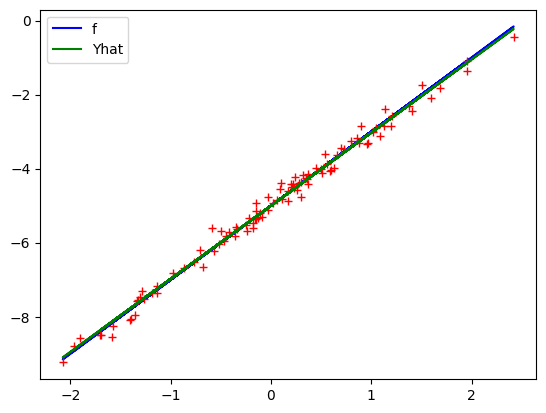

In [20]:
Yhat = model(X).detach().numpy()
plotModel(X,Y,Yhat)

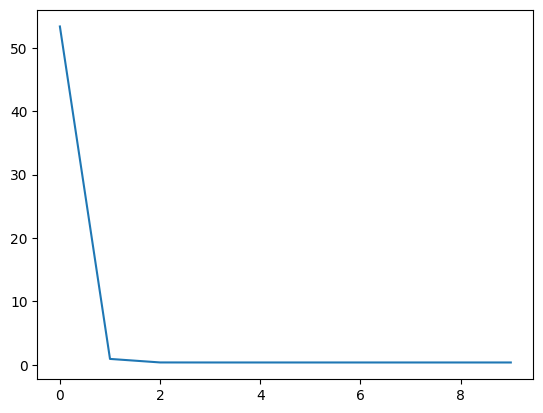

In [21]:
plt.plot(Loss)